In [265]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<div style="color:dark green"> **All of my edits will be in green. I've made this revision version to write on here but make your edits in your original notebook!**</div>

# Energy Analysis!

<div style = "color:dark green">**At this point, students have visualized their utility network as well as water flow from immediate sources. Make the transition here to say something like "now that you have done ^^, we'll analyze differences between years in energy consumption." Provide a brief outline of the types of analysis students will do so know what to expect and what to look for.**</div>



## Functions Used In This Section:

1. <div style = "color:dark green">**Make sure to cover these functions in the introduction notebook.**</div>


2. <div style = "color:dark green">**Note: When you refer to code in markdown, use the \`\` marks to change the font so it's easier for students to see that it's code syntax. Here's an example: `tablename['column_name']`. This tick mark can be found on the upper left part of your keyboard where the ~ (tilda) sign is.**</div>


- tablename['column name'] : Returns a column of a table with that name.


- numpy.where(condition[, x, y]) : Return elements chosen from x or y depending on condition.


- numpy.sort(a, axis=-1, kind='quicksort', order=None)[source] : Return a sorted copy of an array.


- numpy.append(arr, values, axis=None)[source] : Append values to the end of an array.

<div style = "color:dark green">**Before diving in to code, always introduce what you are about to make students do and explain the goals for each section.**</div>


### 2010 Data

In [266]:
data = Table().read_table('network2010.csv')
data

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1801001PD,1801001E,1624,163.1,0,1624
2010,2010,1801007PD,1801007E,2015.2,163.1,0,2015.2
2010,2010,1801009PD,1801017PD,561.768,25,0,557.004
2010,2010,1801009PD,1801009E,2924.55,163.1,0,2924.55
2010,2010,1801011PD,1801011E,1350,163.1,0,1350
2010,2010,1801015PD,1801017PD,616.923,25,0,611.692
2010,2010,1801015PD,1801015E,840,163.1,0,840
2010,2010,1801015PD,1801019PD,1415,25,0,1414.56
2010,2010,1801015PD,1801001PD,1460.72,87,0,1460.72
2010,2010,1801015PD,1801009PD,2949,25,0,2924.55


### 2015 Data

In [267]:
data_1 = Table().read_table('network2015.csv')
data_1

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1803005NPD,1803005E,733,17.6,0,733
2015,2015,SW1803005W,1803005NPD,733,87,236,0
2015,2015,1803005WIMP,1803005PD,962.992,0,224,0
2040,2015,SW1803005W,1803005NPD,2240,87,236,0
2025,2015,1803005NPD,1803005E,2240,17.6,0,2240
2035,2015,SW1803005W,1803005NPD,2240,87,236,0
2020,2015,1803005NPD,1803005E,2240,17.6,0,2240
2020,2015,SW1803005W,1803005NPD,2240,87,236,0
2030,2015,1803005NPD,1803005E,2240,17.6,0,2240
2030,2015,SW1803005W,1803005NPD,2240,87,236,0


# Dictionary For Sources

<div style = "color:dark green">**Jason has something similar in his notebook, so you'll probably look to add to his or get rid of this altogether if you think it's redundant. Same goes for the 6 utilities below. **</div>

- NPD (Non-potable distribution): Utility + "NPD" for treated non-potable water delivered to end-user


- PD (Potable distribution): Utility + "PD" for treated potable water delivered to an end-user


- GW (Groundwater): For water sources, “GW” + DWR basin/subbasin code, if basin is known OR “GW” + Utility Code, if not; for groundwater sold
untreated to a retail utility, Utility code + “GW”


- GWR (Groundwater recharge): Similar to groundwater codes described above, substituting “GWR” for “GW”


- SW (Surface water): "SW" + utility code for unspecified surface water source

In this lab, we will be focusing  on 6 utilities.
- Alameda (1805003E) 
- Fresno (1803033E) 
- Hidesert (1810019E) 
- Palmdale (1809027E) 
- San Jose (1805085E)
- Santa Monice (1807341E)

# 2010 Data for 6 Utilities

<div style = "color:dark green">**IMPORTANT: I think this shows a good thought process, but we don't want to show all of these tables to students like this because a. it take up a lot of space and b. it can get really confusing to look at so many different tables at the same time. Let's restructure this notebook so that you take students through one example using one utility (that is not one of the 6 assigned to students -- you can pick whatever you think makes most sense), and then provide a space where students can *try it themselves* using their own utility. Looking at this, it's really hard for me to figure out what exactly you are doing with all of these tables, so make sure include explanations on what you are doing, why you are doing it and now and then revisit how it relates to the overall motivations of this analysis.**</div>


In [268]:
#Getting data for 2010.
data_2010 = data.where(data['year'] == 2010)
data_2010

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1801001PD,1801001E,1624,163.1,0,1624
2010,2010,1801007PD,1801007E,2015.2,163.1,0,2015.2
2010,2010,1801009PD,1801017PD,561.768,25,0,557.004
2010,2010,1801009PD,1801009E,2924.55,163.1,0,2924.55
2010,2010,1801011PD,1801011E,1350,163.1,0,1350
2010,2010,1801015PD,1801017PD,616.923,25,0,611.692
2010,2010,1801015PD,1801015E,840,163.1,0,840
2010,2010,1801015PD,1801019PD,1415,25,0,1414.56
2010,2010,1801015PD,1801001PD,1460.72,87,0,1460.72
2010,2010,1801015PD,1801009PD,2949,25,0,2924.55


##### Alameda

In [269]:
#Data where target = Alameda County Water District
alameda = data_2010.where(data_2010['target'] == "1805003E")

#where do they get most water?
alameda = alameda.sort('cumulative_volume_af', descending = True)
alameda

#most of the volume came from PD (Portable Distribution) with 318.af transmissionkwh/af.

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1805003PD,1805003E,43000,318.2,0,43000
2010,2010,GWR1805-2-09.01,1805003E,15700,318.2,0,0


##### Fresno

In [270]:
#Data where target = Fresno 
fresno = data_2010.where(data_2010['target'] == "1803033E")

#where do they get most water?
fresno = fresno.sort('cumulative_volume_af', descending = True)
fresno

#most of the volume came from PD, cumulative volume af: 61955.8 and transmission kwh/af: 17.6. 
#next is from SW, which required higher cost for transmission energy than GW, but had higher cumulative volume.

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1803033PD,1803033E,61955.8,17.6,0,61955.8
2010,2010,SW_CVPFKC,1803033E,53121,23.22,0,53121
2010,2010,1803033GW,1803033E,14116.2,17.6,0,0
2010,2010,1803033NPD,1803033E,88,21.12,0,88


##### Hi-desert

In [271]:
#Data where target = Hi-Desert Water District
hidesert = data_2010.where(data_2010['target'] == "1810019E")
hidesert

#has only one source, which is PD.

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1810019PD,1810019E,2956.95,17.6,0,2956.95


##### Palmdale

In [272]:
#Data where target = Palmdale Water District
palmdale = data_2010.where(data_2010['target'] == "1809027E")
palmdale

#has only one source, which is PD

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1809027PD,1809027E,19800,163.1,0,19800


##### San Jose Water

In [273]:
#Data where target = San Jose Water Company
sanjose_water = data_2010.where(data_2010['target'] == "1805085E")

#where do they get most water?
sanjose_water = sanjose_water.sort('cumulative_volume_af', descending = True)
sanjose_water

#highest amount of volume came from PD with lower transmission kwh/af than NPD.

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1805085PD,1805085E,119991,318.2,0,119991
2010,2010,1805085NPD,1805085E,1208,381.84,0,1208


##### Santa Monice

In [274]:
#Data where target = Santa Monica
santa_monica = data_2010.where(data_2010['target'] == "1807341E")

#where do they get most water?
santa_monica = santa_monica.sort('cumulative_volume_af', descending = True)
santa_monica

#higest volume from PD with lower transmission kwh/af than NPD.

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807341PD,1807341E,12435.8,163.1,0,12435.8
2010,2010,1807341NPD,1807341E,280,195.72,0,280


In california, groundwater aquifers are particularly poorly understood and monitored. 

Energy mainly depended on the target location rather than the source. The highest transmission energy was required with the target location at Alameda, least energy needed in Fresno.
alameda population: 79,177
hi-desert population: 
fresno population: 527,438

# 2015 Data for 6 Utilities

In [275]:
#Getting data for 2015.
data_2015 = data_1.where(data_1['year'] == 2015)
data_2015

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1803005NPD,1803005E,733,17.6,0,733
2015,2015,SW1803005W,1803005NPD,733,87,236,0
2015,2015,1803005WIMP,1803005PD,962.992,0,224,0
2015,2015,1803041WIMP,1803005PD,3228.97,25,224,0
2015,2015,1803005WIMP,1803005WPD,4127.24,25,0,0
2015,2015,1803005WPD,1803005WE,4127.24,17.6,0,17586
2015,2015,R_Kern,1803005WIMP,17586,0,0,0
2015,2015,GW1803-5-22.14,1803005PD,31029,399,181.75,0
2015,2015,1803005PD,1803005E,35221,52.8,0,35221
2015,2015,GWR1803-5-22.08,1803007GW,138.1,0,0,138.1


##### Alameda

In [276]:
#Data where target = Alameda County Water District
alameda_1 = data_2015.where(data_2015['target'] == "1805003E")

#where do they get most water?
alameda_1 = alameda_1.sort('cumulative_volume_af', descending = True)
alameda_1

#most of the volume came from PD (Portable Distribution) with 318.af transmissionkwh/af.

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1805003PD,1805003E,51800,1909.2,0,51800
2015,2015,1805003NPD,1805003E,3065,381.84,0,3065


##### Fresno

In [277]:
#Data where target = Fresno 
fresno_1 = data_2015.where(data_2015['target'] == "1803033E")

#where do they get most water?
fresno_1 = fresno_1.sort('cumulative_volume_af', descending = True)
fresno_1

#most of the volume came from PD, cumulative volume af: 61955.8 and transmission kwh/af: 17.6. 
#next is from SW, which required higher cost for transmission energy than GW, but had higher cumulative volume.

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1803033PD,1803033E,113066,52.8,0,113066
2015,2015,1803033NPD,1803033E,15022,84.48,0,15022


##### Hi-desert

In [278]:
#Data where target = Hi-Desert Water District
hidesert_1 = data_2015.where(data_2015['target'] == "1810019E")
hidesert_1

#has only one source, which is PD.

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1810019PD,1810019E,2837,88,0,2837


##### Palmdale

In [279]:
#Data where target = Palmdale Water District
palmdale_1 = data_2015.where(data_2015['target'] == "1809027E")
palmdale_1

#has only one source, which is PD

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1809027NPD,1809027E,110,195.72,0,110
2015,2015,1809027PD,1809027E,17015,489.3,0,17015


##### San Jose Water

In [280]:
#Data where target = San Jose Water Company
sanjose_water_1 = data_2015.where(data_2015['target'] == "1805085E")

#where do they get most water?
sanjose_water_1 = sanjose_water_1.sort('cumulative_volume_af', descending = True)
sanjose_water_1

#highest amount of volume came from PD with lower transmission kwh/af than NPD.

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1805085PD,1805085E,106451,954.6,0,106451
2015,2015,1805085NPD,1805085E,2092.98,2227.4,0,2092.98


##### Santa Monica

In [281]:
#Data where target = Santa Monica
santa_monica_1 = data_2015.where(data_2015['target'] == "1807341E")

#where do they get most water?
santa_monica_1 = santa_monica_1.sort('cumulative_volume_af', descending = True)
santa_monica_1

#higest volume from PD with lower transmission kwh/af than NPD.

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1807341PD,1807341E,11917,489.3,0,11917


# Combining Data: 2010 and 2015

<div style = "color:dark green">**Again, explain what you are doing. **</div>


##### Alameda

In [282]:
alameda_final = alameda.append(alameda_1)
alameda_final

#stopped getting groundwater but used portable and nonportable water as a source.
#increase in cumulative volume

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1805003PD,1805003E,43000,318.2,0,43000
2010,2010,GWR1805-2-09.01,1805003E,15700,318.2,0,0
2015,2015,1805003PD,1805003E,51800,1909.2,0,51800
2015,2015,1805003NPD,1805003E,3065,381.84,0,3065


##### Fresno

In [283]:
fresno_final = fresno.append(fresno_1)
fresno_final
#all from portable and nonportable water andincrease in cumulative volume


year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1803033PD,1803033E,61955.8,17.6,0,61955.8
2010,2010,SW_CVPFKC,1803033E,53121,23.22,0,53121
2010,2010,1803033GW,1803033E,14116.2,17.6,0,0
2010,2010,1803033NPD,1803033E,88,21.12,0,88
2015,2015,1803033PD,1803033E,113066,52.8,0,113066
2015,2015,1803033NPD,1803033E,15022,84.48,0,15022


##### Hi-desert

In [284]:
hidesert_final = hidesert.append(hidesert_1)
hidesert_final

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1810019PD,1810019E,2956.95,17.6,0,2956.95
2015,2015,1810019PD,1810019E,2837,88,0,2837


##### Palmdale

In [285]:
palmdale_final = palmdale.append(palmdale_1)
palmdale_final

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1809027PD,1809027E,19800,163.1,0,19800
2015,2015,1809027NPD,1809027E,110,195.72,0,110
2015,2015,1809027PD,1809027E,17015,489.3,0,17015


##### San Jose 

In [286]:
sanjose_water_final = sanjose_water.append(sanjose_water_1)
sanjose_water_final


year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1805085PD,1805085E,119991,318.2,0,119991
2010,2010,1805085NPD,1805085E,1208,381.84,0,1208
2015,2015,1805085PD,1805085E,106451,954.6,0,106451
2015,2015,1805085NPD,1805085E,2092.98,2227.4,0,2092.98


##### Santa Monica

In [287]:
santa_monica_final = santa_monica.append(santa_monica_1)
santa_monica_final

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807341PD,1807341E,12435.8,163.1,0,12435.8
2010,2010,1807341NPD,1807341E,280,195.72,0,280
2015,2015,1807341PD,1807341E,11917,489.3,0,11917


# Let's Observe San Jose Water Utility 

In [288]:
sanjose_water_final

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1805085PD,1805085E,119991,318.2,0,119991
2010,2010,1805085NPD,1805085E,1208,381.84,0,1208
2015,2015,1805085PD,1805085E,106451,954.6,0,106451
2015,2015,1805085NPD,1805085E,2092.98,2227.4,0,2092.98


## How to calculate the amount of energy used.
- transmission_kwh = cumulative_volume_af * transmission_kwh/af

## How to calculate the percentage increase.
- Increase = New Number - Original Number
- % Increase = Increase / Original Number * 100

#### Actual 2010 Data

In [289]:
sanjose_2010 = data_2010.where(data_2010['target'] == "1805085E")
sanjose_2010

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1805085NPD,1805085E,1208,381.84,0,1208
2010,2010,1805085PD,1805085E,119991,318.2,0,119991


#### Predicted 2015 Data

In [290]:
#Predicted San Jose Water Utility
#Getting data for 2010.
data_2010_pred = data.where(data['year'] == 2015)
sanjose_pred = data_2010_pred.where(data_2010_pred['target'] == "1805085E")
sanjose_pred

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2010,1805085NPD,1805085E,2556,381.84,0,2556
2015,2010,1805085PD,1805085E,127713,318.2,0,127713


#### Actual 2015 Data

In [291]:
# San Jose Water Utility data in 2015

sanjose_water_actual = data_2015.where(data_2015['target'] == "1805085E")
sanjose_water_actual

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1805085NPD,1805085E,2092.98,2227.4,0,2092.98
2015,2015,1805085PD,1805085E,106451,954.6,0,106451


# Actual 2010 vs Predicted 2015


### Amount of energy used in 2010 vs 2015 projection

#### What is the total amount of energy used in 2010?

In [292]:
actual_energy_2010 = 1208 * 381.84 + 119991 * 318.2
print ("Amount of Energy used in 2010 : " + str(actual_energy_2010) + " kwh")

Amount of Energy used in 2010 : 38642398.919999994 kwh


#### What is the total amount of energy predicted to be used in 2015?

In [293]:
projection_energy_2015 = 2556 * 381.84 + 127713 * 318.2
print ("Amount of Energy used in 2015 projection : " + str(projection_energy_2015) + " kwh")

Amount of Energy used in 2015 projection : 41614259.64 kwh


#### What is the predicted percent increase of energy used between 2010 and 2015?

In [294]:
diff_2010 = projection_2015 - actual_energy_2010
percent = diff_2010 / actual_energy_2010
print ("Transmission energy is expected to increase by " + str(percent) + "%")

Transmission energy is expected to increase by 0.07690673465052067%


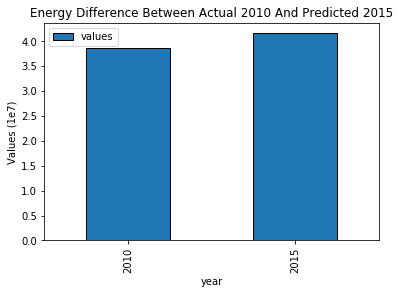

In [301]:
data = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [actual_energy_2010/(10**7), projection_energy_2015/(10**7)]})                                          
graph = data.plot.bar(x='year', y='values')
plt.title("Energy Difference Between Actual 2010 And Predicted 2015")
plt.ylabel('Values (1e7)')
graph



### Cumulative volume change 2010 vs 2015 projection

#### What is the total amount of water transported in 2010?

In [296]:
volume_2010 = 1208 + 119991
print ("Amount of volume used in 2010 : " + str(volume_2010))

Amount of volume used in 2010 : 121199


#### What is the total amount of water predicted to be transported in 2015?

In [297]:
volume_2015 = 2556 + 127713
print ("Amount of volume used in 2015 : " + str(volume_2015))

Amount of volume used in 2015 : 130269


#### What is the predicted percent increase of cumulative volume of water transported between 2010 and 2015?

In [298]:
percent_v = (volume_2015 - volume_2010) / volume_2010
print ("Volume of water expected to change by " + str(percent_v) + "% from 2010 and 2015")

Volume of water expected to change by 0.07483560095380325% from 2010 and 2015


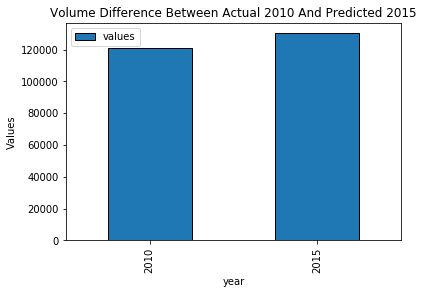

In [299]:
data_1 = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [volume_2010, volume_2015]})
graph_1 = data_1.plot.bar(x='year', y='values')
plt.title("Volume Difference Between Actual 2010 And Predicted 2015")
plt.ylabel('Values')
graph_1



# Actual 2010 vs Actual 2015

### Amount of energy used in 2010 vs 2015 


#### What is the total amount of energy used in 2010?

In [243]:
energy = 119991 * 318.2 + 1208 * 381.84
print ("The total transmission_kwh in 2010 : " + str(energy) + " kwh")

The total transmission_kwh in 2010 : 38642398.919999994 kwh


#### What is the total amount of energy used in 2015?

In [244]:
energy1 = 106451 * 954.6 + 2092.98 * 2227.4
print ("The total transmission_kwh in 2015 : " + str(energy1) + " kwh")

The total transmission_kwh in 2015 : 106280028.252 kwh


#### What is the percent increase of energy used between 2010 and 2015?

In [245]:
increase = energy1 - energy
percentage_inc = increase / energy * 100
print ("The percentage increase of energy from 2010 to 2015 : " + str(percentage_inc) + "%")

The percentage increase of energy from 2010 to 2015 : 175.0347577334105%


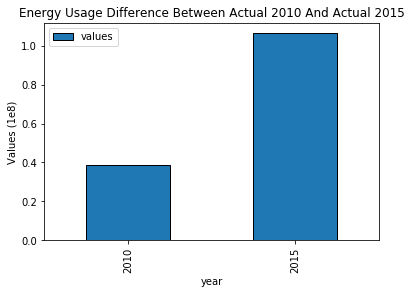

In [303]:
data_2 = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [energy/(10**8), energy1/(10**8)]})
graph_2 = data_2.plot.bar(x='year', y='values')
plt.title("Energy Usage Difference Between Actual 2010 And Actual 2015")
plt.ylabel('Values (1e8)')
graph_2

### Cumulative volume change 2010 vs 2015 

#### What is the total amount of water transported in 2010?

In [247]:
volume = 119991 + 1208
print ("The total volume of water transported in 2010: " + str(volume))

The total volume of water transported in 2010: 121199


#### What is the total amount of water transported in 2015?

In [248]:
volume1 = 106451 + 2092.98
print ("The total volume of water transported in 2015: " + str(volume1))

The total volume of water transported in 2015: 108543.98


#### What is the percent increase of cumulative volume of water transported between 2010 and 2015?

In [249]:
decrease = volume1 - volume
percentage_dec = decrease / volume * 100
print ("The percentage decrease of volume of water transported from 2010 to 2015 : " + str(percentage_dec) + " %")

The percentage decrease of volume of water transported from 2010 to 2015 : -10.441521794734284 %


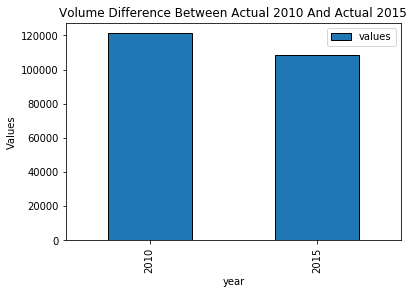

In [302]:
data_3 = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [volume, volume1]})
graph_3 = data_3.plot.bar(x='year', y='values')
plt.title("Volume Difference Between Actual 2010 And Actual 2015")
plt.ylabel('Values')
graph_3

# 2015 projection vs 2015 actual

### Amount of energy used in 2015 predicted vs 2015  actual



#### What is the total amount of energy predicted to be used in 2015?

In [251]:
projection = 2556 * 381.84 + 127713 * 318.2
print ("Amount of Energy used in 2015 projection : " + str(projection) + " kwh")

Amount of Energy used in 2015 projection : 41614259.64 kwh


#### What is the total amount of energy used in 2015?

In [252]:
actual = 2092.98 * 2227.4 + 106451 * 954.6
print ("Amount of Energy used in 2015 : " + str(actual) + " kwh")

Amount of Energy used in 2015 : 106280028.252 kwh


#### What is the difference of energy usage between 2015 predicted and 2015 actual?

In [253]:
diff = actual - projection
print ("The actual energy used in 2015 is " + str(diff) + " kwh" + " greater than the projection made in 2010")

The actual energy used in 2015 is 64665768.612 kwh greater than the projection made in 2010


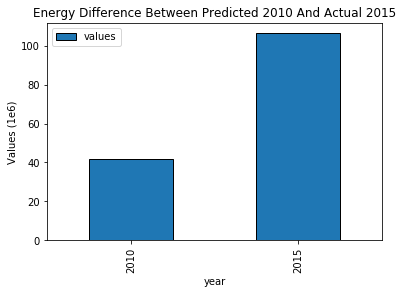

In [304]:
data_4 = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [projection/(10**6), actual/(10**6)]})
graph_4 = data_4.plot.bar(x='year', y='values')
plt.title("Energy Difference Between Predicted 2010 And Actual 2015")
plt.ylabel('Values (1e6)')
graph_4

all graphs put next to each other

###  Cumulative volume in 2015 projection vs 2015 actual

#### What is the total amount of water predicted to be transported in 2010?

In [256]:
projection_v = 2556 + 127713
print ("The projected amount of volume in 2015 : " + str(projection_v))

The projected amount of volume in 2015 : 130269


#### What is the total amount of water transported in 2015?

In [155]:
actual_v = 2092.98 + 106451
print ("The actual amount of volume in 2015 : " + str(actual_v))

The actual amount of volume in 2015 : 108543.98


#### What is the difference of volume of water transported between 2015 predicted and 2015 actual?

In [156]:
diff_v = actual_v - projection_v
print ("The actual amount of volume used in 2015 is " + str(-diff_v) + " less than the projected amount of volume")

The actual amount of volume used in 2015 is 21725.020000000004 less than the projected amount of volume


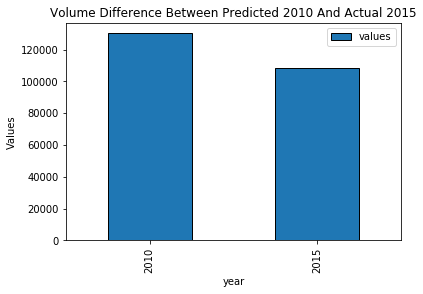

In [306]:
data_5 = pd.DataFrame(data = 
                      {"year" : [2010, 2015], 
                       "values" : [projection_v, actual_v]})
graph_5 = data_5.plot.bar(x='year', y='values')
plt.title("Volume Difference Between Predicted 2010 And Actual 2015")
plt.ylabel('Values')
graph_5

## Discussion Questions

##### What do you think caused a significant increase of usage of energy between 2010 and 2015?

##### What are the differences you can find between actual 2015 data and predicted 2015 data?

##### Can you connect information found through the energy flow chart and the analysis done with San Jose Water Utility?

## Can you do your own?

### Let's try to do for Santa Monica!!!

###### print 2010 actual, 2015 actual, and 2015 predicted data for Santa Monica
the code for Santa Monica is 1807341E.

In [ ]:
santamonica_2010 = ....where(data_2010['target'] == "1807341E")
santamonica_2010

In [ ]:
data_2010_pred = data.where(...)
santamonica_pred = data_2010_pred.where(...)
santamonica_pred

In [ ]:
santamonica_water_actual = data_2015.where(...)
santamonica_water_actual

# Actual 2010 vs Predicted 2015



### Amount of energy used in 2010 vs 2015 projection

#### What is the total amount of energy used in 2010?

In [ ]:
actual_energy_2010 = ...
print ("Amount of Energy used in 2010 : " + str(actual_energy_2010) + " kwh")

#### What is the total amount of energy predicted to be used in 2015?

In [ ]:
projection_2015 = ...
print ("Amount of Energy used in 2015 projection : " + str(projection_2015) + " kwh")

#### What is the predicted percent increase of energy used between 2010 and 2015?

In [ ]:
diff_2010 = ...
percent = ...
print ("Transmission energy is expected to increase by " + str(percent) + "%")

### Cumulative volume change 2010 vs 2015 projection


#### What is the total amount of water transported in 2010?

In [ ]:
volume_2010 = ...
print ("Amount of volume used in 2010 : " + str(volume_2010))

#### What is the total amount of water predicted to be transported in 2015?

In [ ]:
volume_2015 = ...
print ("Amount of volume used in 2015 : " + str(volume_2015))

#### What is the predicted percent increase of cumulative volume of water transported between 2010 and 2015?

In [ ]:
percent_v = ...
print ("Volume of water expected to change by " + str(percent_v) + "% from 2010 and 2015")

# Actual 2010 vs Actual 2015

### Amount of energy used in 2010 vs 2015 



#### What is the total amount of energy used in 2010?

In [ ]:
energy = ...
print ("The total transmission_kwh in 2010 : " + str(energy) + " kwh")

#### What is the total amount of energy used in 2015?

In [ ]:
energy1 = ...
print ("The total transmission_kwh in 2015 : " + str(energy1) + " kwh")

#### What is the percent increase of energy used between 2010 and 2015?

In [ ]:
increase = ...
percentage_inc = ...
print ("The percentage increase of energy from 2010 to 2015 : " + str(percentage_inc) + "%")

### Cumulative volume change 2010 vs 2015 

#### What is the total amount of water transported in 2010?

In [ ]:
volume = ...
print ("The total volume of water transported in 2010: " + str(volume))

#### What is the total amount of water transported in 2015?

In [ ]:
volume1 = ...
print ("The total volume of water transported in 2015: " + str(volume1))

#### What is the percent increase of cumulative volume of water transported between 2010 and 2015?

In [ ]:
decrease = ...
percentage_dec = ...
print ("The percentage decrease of volume of water transported from 2010 to 2015 : " + str(percentage_dec) + " %")

# 2015 projection vs 2015 actual

### Amount of energy used in 2015 predicted vs 2015  actual



#### What is the total amount of energy predicted to be used in 2015?

In [ ]:
projection = ...
print ("Amount of Energy used in 2015 projection : " + str(projection) + " kwh")

#### What is the total amount of energy used in 2015?

In [ ]:
actual = ...
print ("Amount of Energy used in 2015 : " + str(actual) + " kwh")

#### What is the difference of energy usage between 2015 predicted and 2015 actual?

In [ ]:
diff = ...
print ("The actual energy used in 2015 is " + str(diff) + " kwh" + " greater than the projection made in 2010")

###  Cumulative volume in 2015 projection vs 2015 actual

#### What is the total amount of water predicted to be transported in 2010?

In [ ]:
projection_v = ...
print ("The projected amount of volume in 2015 : " + str(projection_v))

#### What is the total amount of water transported in 2015?

In [ ]:
actual_v = ...
print ("The actual amount of volume in 2015 : " + str(actual_v))

#### What is the difference of volume of water transported between 2015 predicted and 2015 actual?

In [ ]:
diff_v = ...
print ("The actual amount of volume used in 2015 is " + str(-diff_v) + " less than the projected amount of volume")

# DONE